## Lab3 Goal 1.3 FNN Solution

Based on the model created in Goal 1.1 FNN solution notebook, this notebook calculates:
* Display the confusion matrix resulting from applying the model to the test data
* Calculate the following metrics:
  * Accuracy - The proportion of total predictions that were correct [(TP+TN)/(TP+TN+FP+FN)].
  * Precision - The proportion of predicted positives that are actually correct [TP/(TP+FP)].
  * Recall - The proportion of actual positives that were correctly identified [TP/(TP+FN)].
  * F1 Score - The harmonic mean of precision and recall.

In [4]:
#only if you get restart karnell with plt.show
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchmetrics.classification import MulticlassConfusionMatrix, MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassF1Score

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [15]:
#Load trained model
model = NeuralNetwork()
model.load_state_dict(torch.load("model_FNN.pth", weights_only=True))
model.eval() #tune network to evaluation mode
print('trained model loaded')

trained model loaded


In [17]:
# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

print(f"Size: Test data: {len(test_data)}")

Size: Test data: 10000


In [37]:
#the batch size matchs the side of the test data
batch_size = len(test_data)

# Create data loaders.
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([10000, 1, 28, 28])
Shape of y: torch.Size([10000]) torch.int64


In [29]:
size = len(test_dataloader.dataset)
num_batches = len(test_dataloader)
test_loss, correct = 0, 0
with torch.no_grad():
    for X, y in test_dataloader:
        #X, y = X.to(device), y.to(device)
        pred = model(X)
        #print(pred.argmax(1), y)
        #test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

print(correct)

6425.0


In [31]:
#confusion matrix
confmat = MulticlassConfusionMatrix(num_classes=10) 

#shows a basic confusion matrix
matrix = confmat(pred, y)
print(matrix)


tensor([[801,   2,  16,  98,  17,   1,  41,   2,  21,   1],
        [ 28, 897,  10,  50,  13,   0,   0,   0,   2,   0],
        [ 19,   1, 600,  10, 318,   0,  24,   0,  28,   0],
        [126,  69,   4, 744,  41,   0,  12,   0,   4,   0],
        [ 17,   8, 270,  78, 610,   0,   2,   0,  15,   0],
        [  1,   0,   0,   2,   1,  11,   0, 508,   8, 469],
        [268,   4, 252,  48, 331,   0,  38,   0,  59,   0],
        [  0,   0,   0,   0,   0,   0,   0, 882,   0, 118],
        [ 17,   2,  21,  24,   8,   1,   5,  20, 900,   2],
        [  0,   0,   0,   1,   2,   0,   0,  53,   2, 942]])


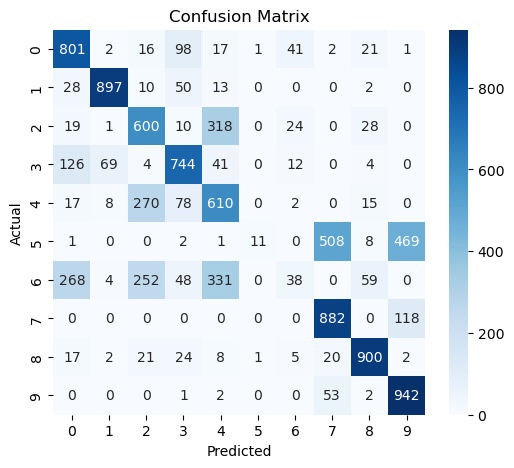

In [33]:
# A visualy more interesting confusion matrix. necessary to install library seaborn (pip install seaborn)
# Convert to NumPy for plotting
matrix_np = matrix.numpy()

plt.figure(figsize=(6, 5))
sns.heatmap(matrix_np, annot=True, fmt="d", cmap="Blues")
#plt.imshow(matrix_np)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [35]:
#calculate metrics

# Initialize metrics
accuracy = MulticlassAccuracy(num_classes=10)
precision = MulticlassPrecision(num_classes=10)
recall = MulticlassRecall(num_classes=10)
f1 = MulticlassF1Score(num_classes=10)

# Compute metrics
acc = accuracy(pred, y)
prec = precision(pred, y)
rec = recall(pred, y)
f1_score = f1(pred, y)


# Print results
print(f"Accuracy:  {acc.item():.2f}")
print(f"Precision: {prec.item():.2f}")
print(f"Recall:    {rec.item():.2f}")
print(f"F1 Score:  {f1_score.item():.2f}")


Accuracy:  0.64
Precision: 0.65
Recall:    0.64
F1 Score:  0.58
